In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cluster_5.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,user_id,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,...,hour_18.0,hour_19.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price,labels5
0,1515915625353226922,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,76.48,76.48,76.480000,4
1,1515915625353230683,12.0,3.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.24,10.03,39.595000,3
2,1515915625353234047,35.0,1.0,0.0,0.0,35.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,240.98,14.29,156.220286,3
3,1515915625353236157,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,52.49,52.49,52.490000,4
4,1515915625353294441,38.0,7.0,0.0,0.0,38.0,1.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1106.16,22.46,222.138158,2


In [4]:
df_group = df.groupby('labels5').agg('mean')

In [5]:
df_group.drop('user_id', axis = 1, inplace = True)

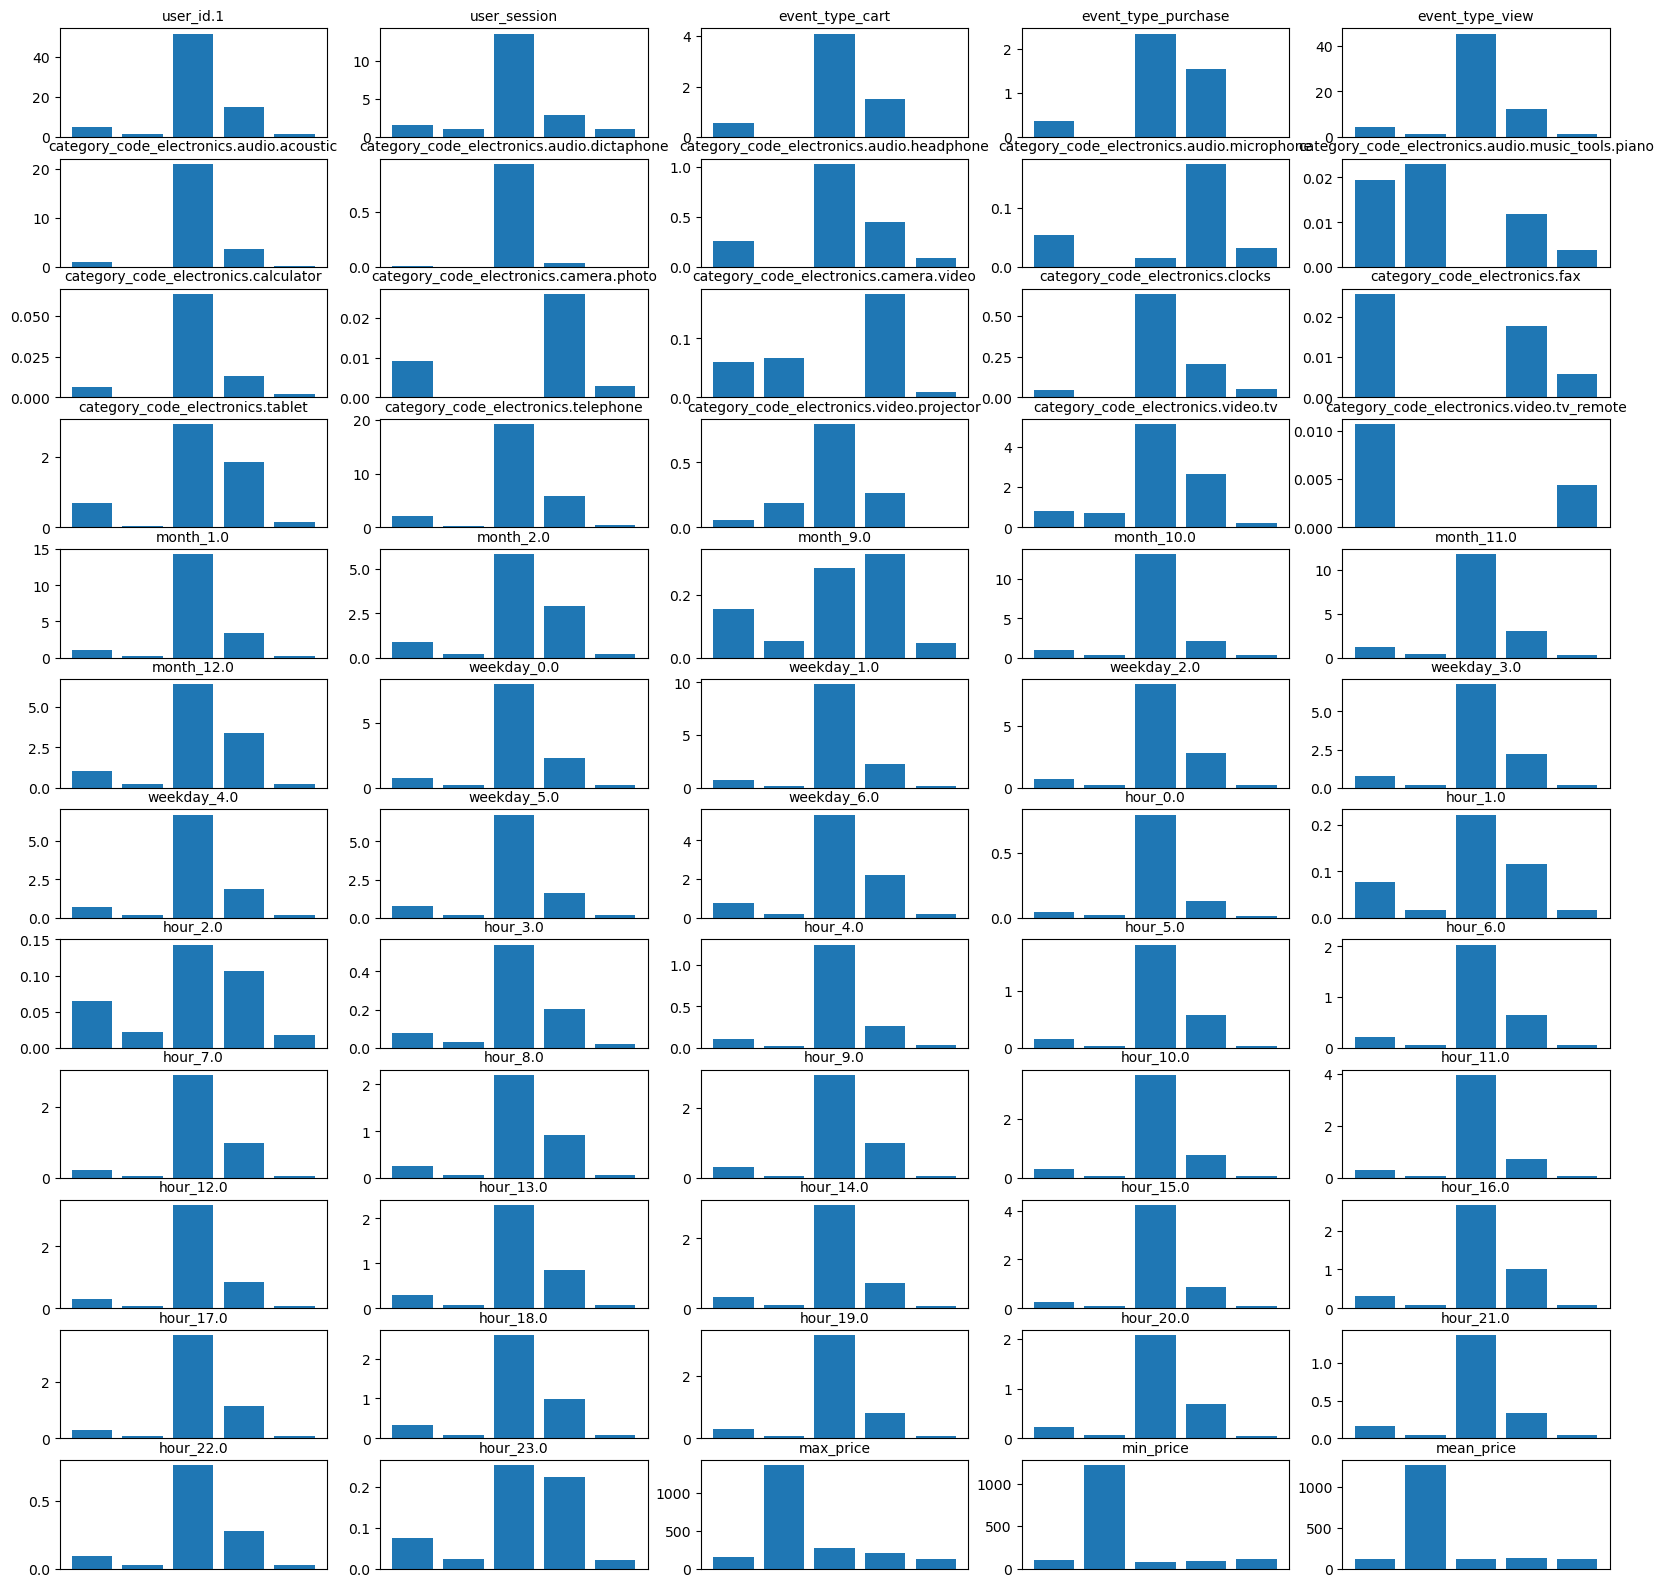

In [6]:
plt.figure(figsize=(20,20))
for idx, col in enumerate(df_group.columns):
    plt.subplot(12,5,idx+1)
    plt.bar(df_group.index,df_group[col])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(col, fontsize=10)
plt.show()

In [7]:
df.drop('user_id', axis = 1, inplace=True)

In [8]:
df.columns

Index(['user_id.1', 'user_session', 'event_type_cart', 'event_type_purchase',
       'event_type_view', 'category_code_electronics.audio.acoustic',
       'category_code_electronics.audio.dictaphone',
       'category_code_electronics.audio.headphone',
       'category_code_electronics.audio.microphone',
       'category_code_electronics.audio.music_tools.piano',
       'category_code_electronics.calculator',
       'category_code_electronics.camera.photo',
       'category_code_electronics.camera.video',
       'category_code_electronics.clocks', 'category_code_electronics.fax',
       'category_code_electronics.tablet',
       'category_code_electronics.telephone',
       'category_code_electronics.video.projector',
       'category_code_electronics.video.tv',
       'category_code_electronics.video.tv_remote', 'month_1.0', 'month_2.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
     

view -> cart, cart -> purchase 전환율 계산

In [9]:
df['view-cart'] = round(df.event_type_cart / df.event_type_view, 4) * 100
df['cart-purchase'] = round(df.event_type_purchase / df.event_type_cart, 4) * 100

전체, 그룹별 요인별 상관관계 시각화

In [10]:
df.corr()

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price,labels5,view-cart,cart-purchase
user_id.1,1.000000,0.550076,0.566028,0.464159,0.971451,0.520934,0.084129,0.117296,0.045733,0.021719,...,0.226087,0.190656,0.133885,0.102549,0.026515,-0.044761,-0.019967,-0.395212,0.208304,0.187853
user_session,0.550076,1.000000,0.165090,0.148311,0.575335,0.484258,0.048199,0.069525,0.007263,0.015615,...,0.117577,0.156968,0.078231,0.041989,0.002074,-0.012505,-0.007076,-0.150288,0.042047,0.085075
event_type_cart,0.566028,0.165090,1.000000,0.618670,0.381638,0.205491,0.079357,0.093111,0.044385,0.035711,...,0.144647,0.079024,0.075994,0.052314,-0.015794,-0.036972,-0.032219,-0.356687,0.655260,-0.002163
event_type_purchase,0.464159,0.148311,0.618670,1.000000,0.269225,0.189753,0.072570,0.083201,0.040418,0.024223,...,0.117985,0.066373,0.077593,0.043749,-0.016296,-0.031756,-0.029166,-0.273046,0.429926,0.809460
event_type_view,0.971451,0.575335,0.381638,0.269225,1.000000,0.529004,0.071228,0.105024,0.038361,0.015009,...,0.214830,0.193458,0.127611,0.101172,0.035334,-0.039839,-0.012820,-0.347888,0.061531,0.046813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min_price,-0.044761,-0.012505,-0.036972,-0.031756,-0.039839,-0.036597,-0.004802,-0.052577,-0.037098,0.030771,...,-0.008754,-0.001423,-0.006112,-0.006581,0.706896,1.000000,0.952884,-0.263318,-0.034675,-0.056748
mean_price,-0.019967,-0.007076,-0.032219,-0.029166,-0.012820,-0.030453,-0.004732,-0.051576,-0.036059,0.029220,...,-0.003044,0.000822,-0.003880,-0.003573,0.855398,0.952884,1.000000,-0.274062,-0.034711,-0.063184
labels5,-0.395212,-0.150288,-0.356687,-0.273046,-0.347888,-0.124878,-0.010186,-0.061487,-0.010204,-0.040700,...,-0.100228,-0.090566,-0.059178,-0.054371,-0.235363,-0.263318,-0.274062,1.000000,-0.372496,-0.124720
view-cart,0.208304,0.042047,0.655260,0.429926,0.061531,0.059652,0.006921,0.045268,0.026625,0.025888,...,0.051895,0.036323,0.033850,0.028311,-0.027231,-0.034675,-0.034711,-0.372496,1.000000,-0.093393


In [11]:
mask = np.zeros_like(df.corr(), dtype='bool')
mask[np.triu_indices_from(mask)] = True

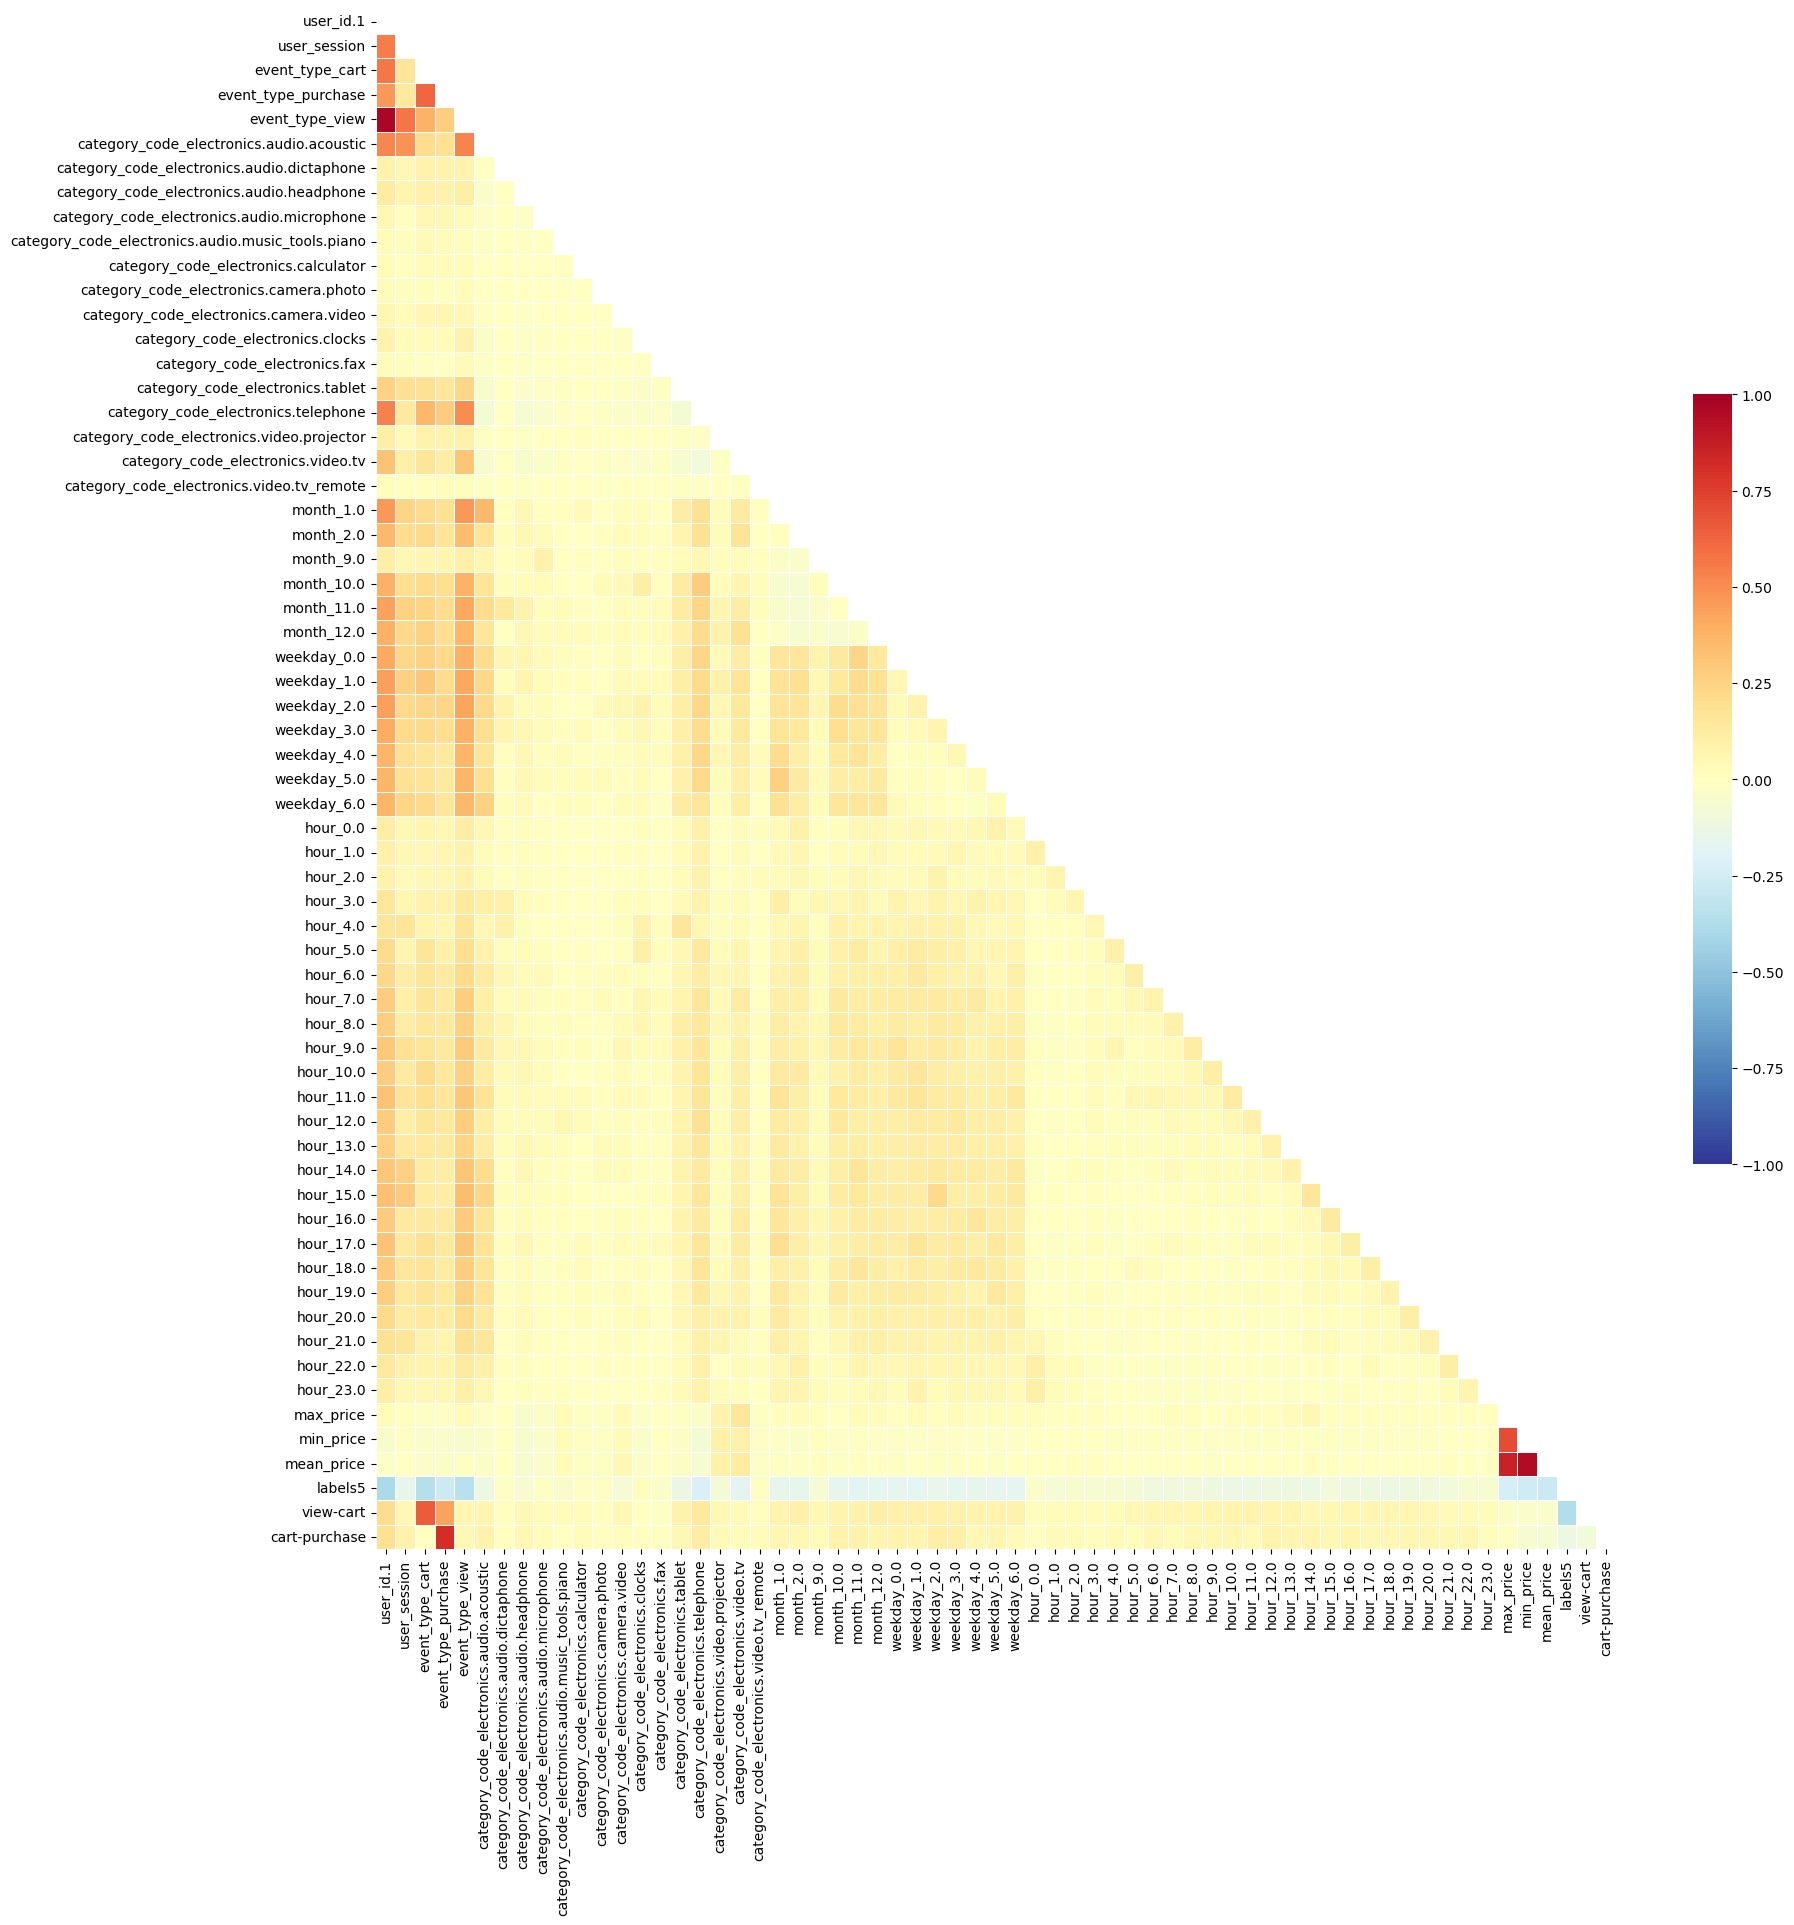

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.show()

In [13]:
df1 = df[df['labels5'] == 1]
df2 = df[df['labels5'] == 2]
df3 = df[df['labels5'] == 3]
df4 = df[df['labels5'] == 4]
df0 = df[df['labels5'] == 0]

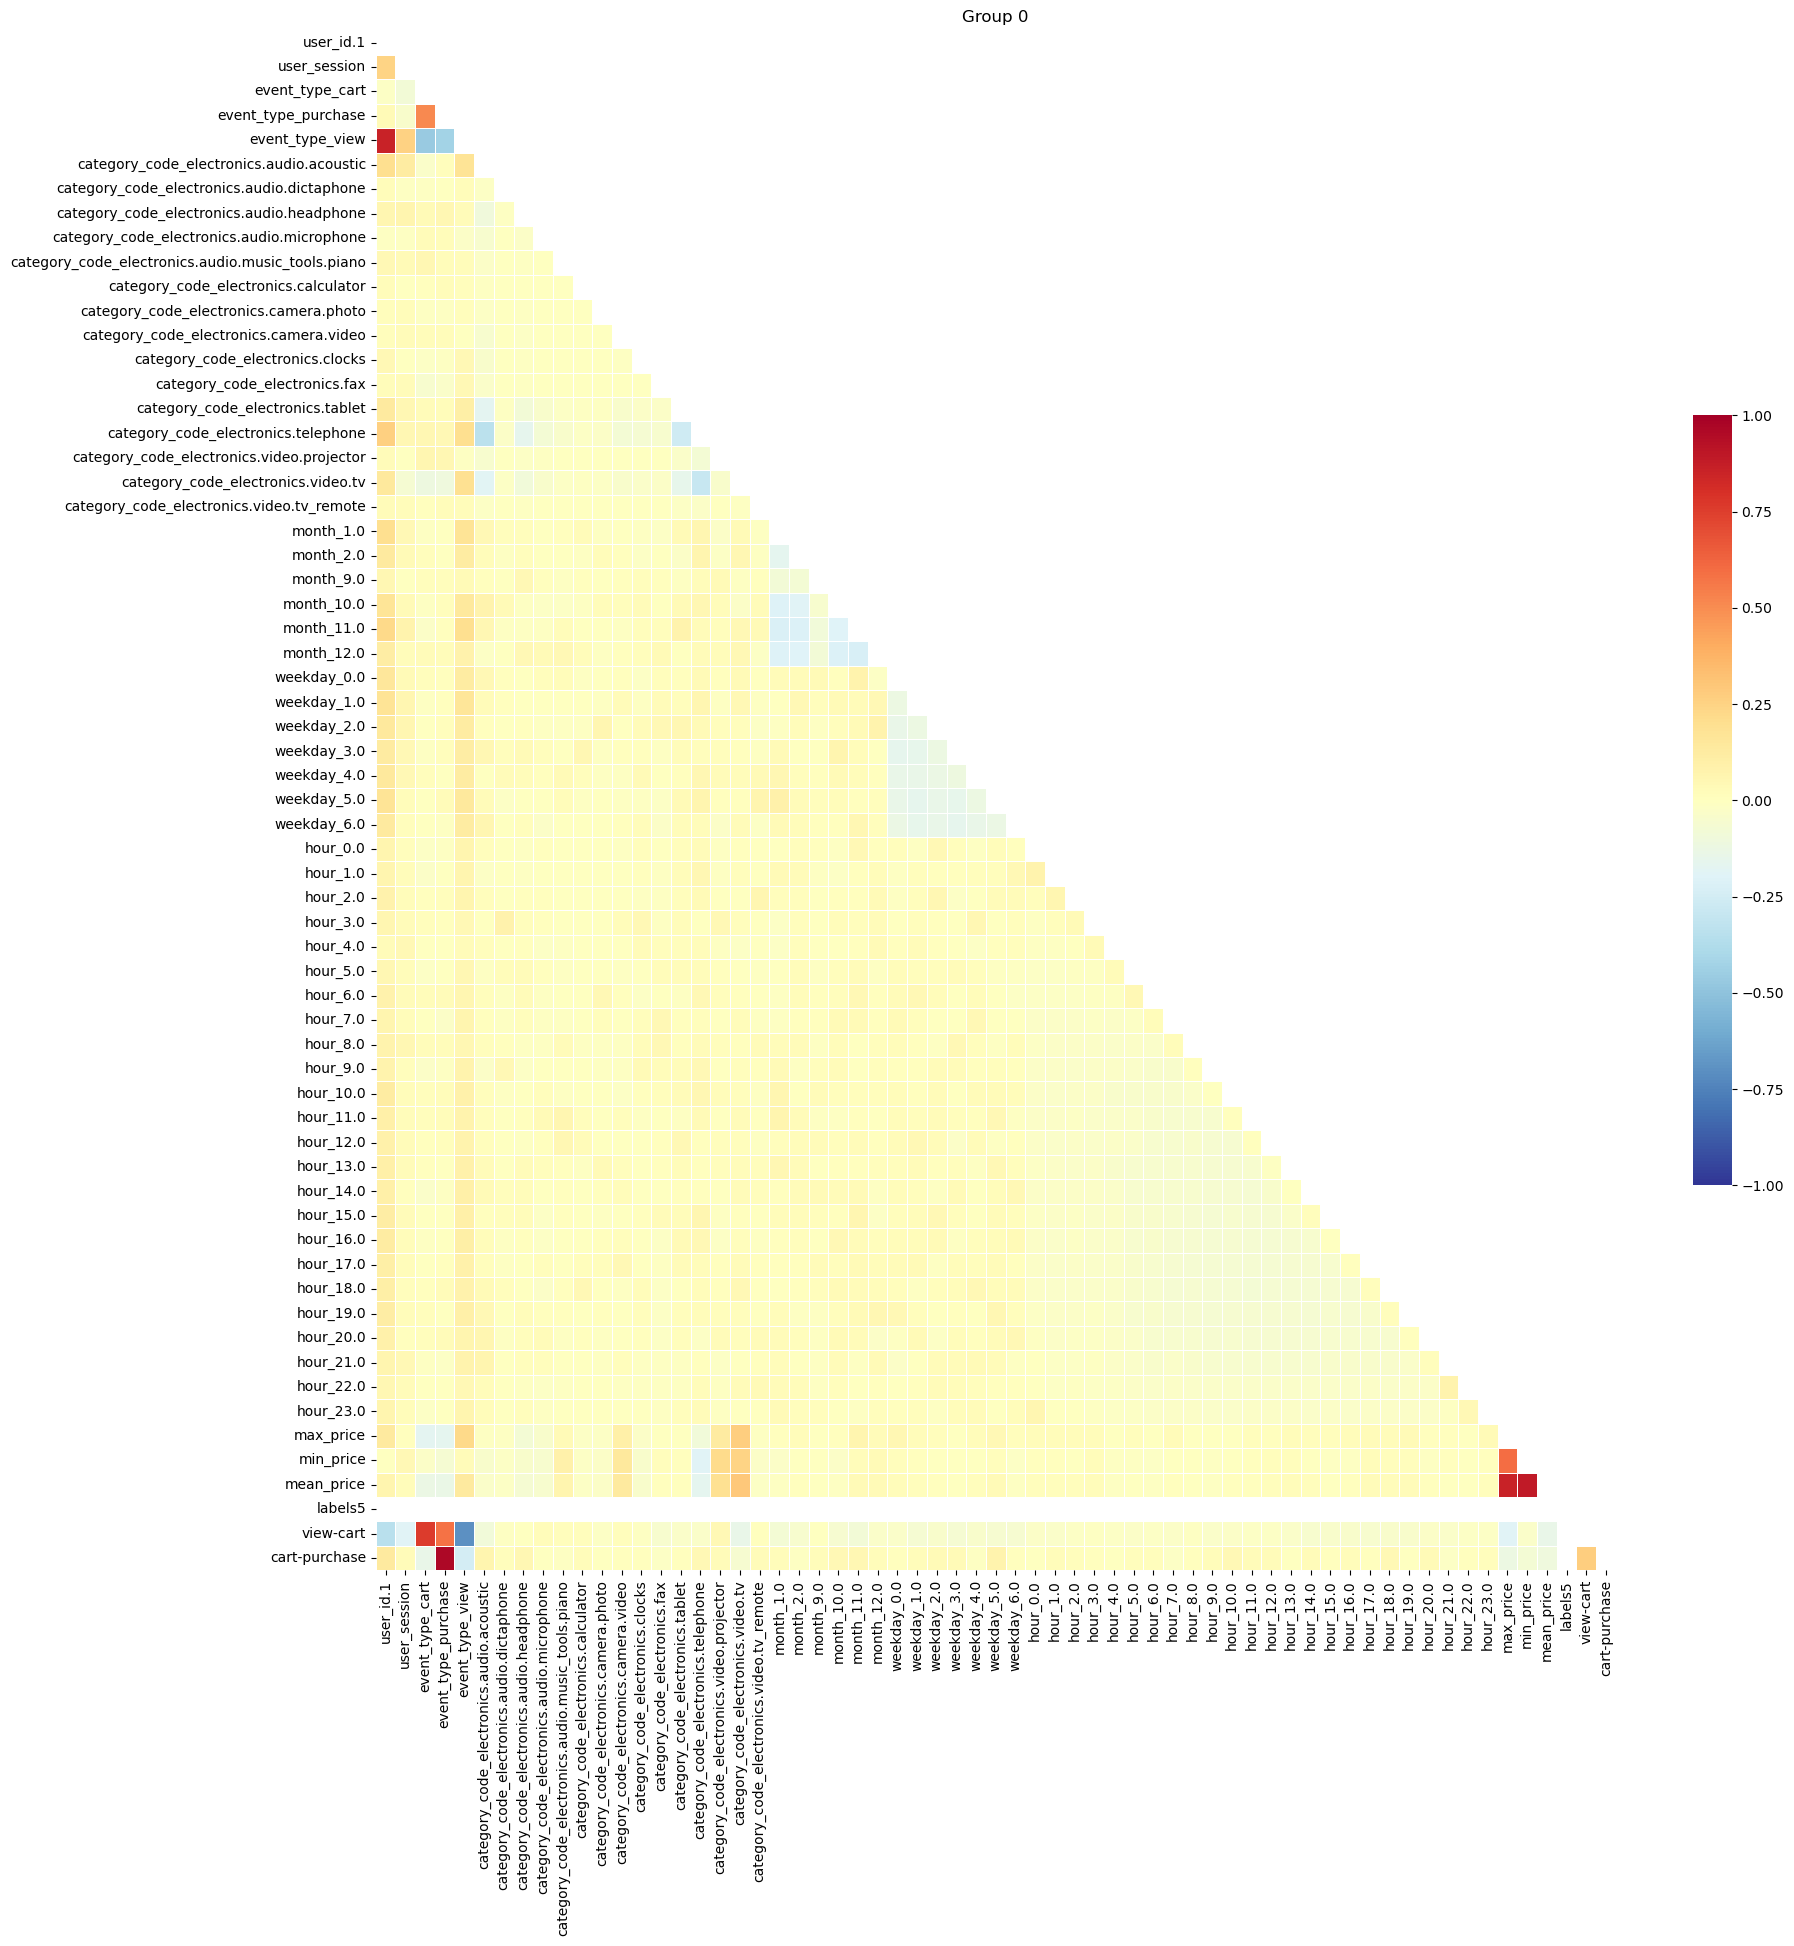

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(df0.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.title('Group 0')

plt.show()

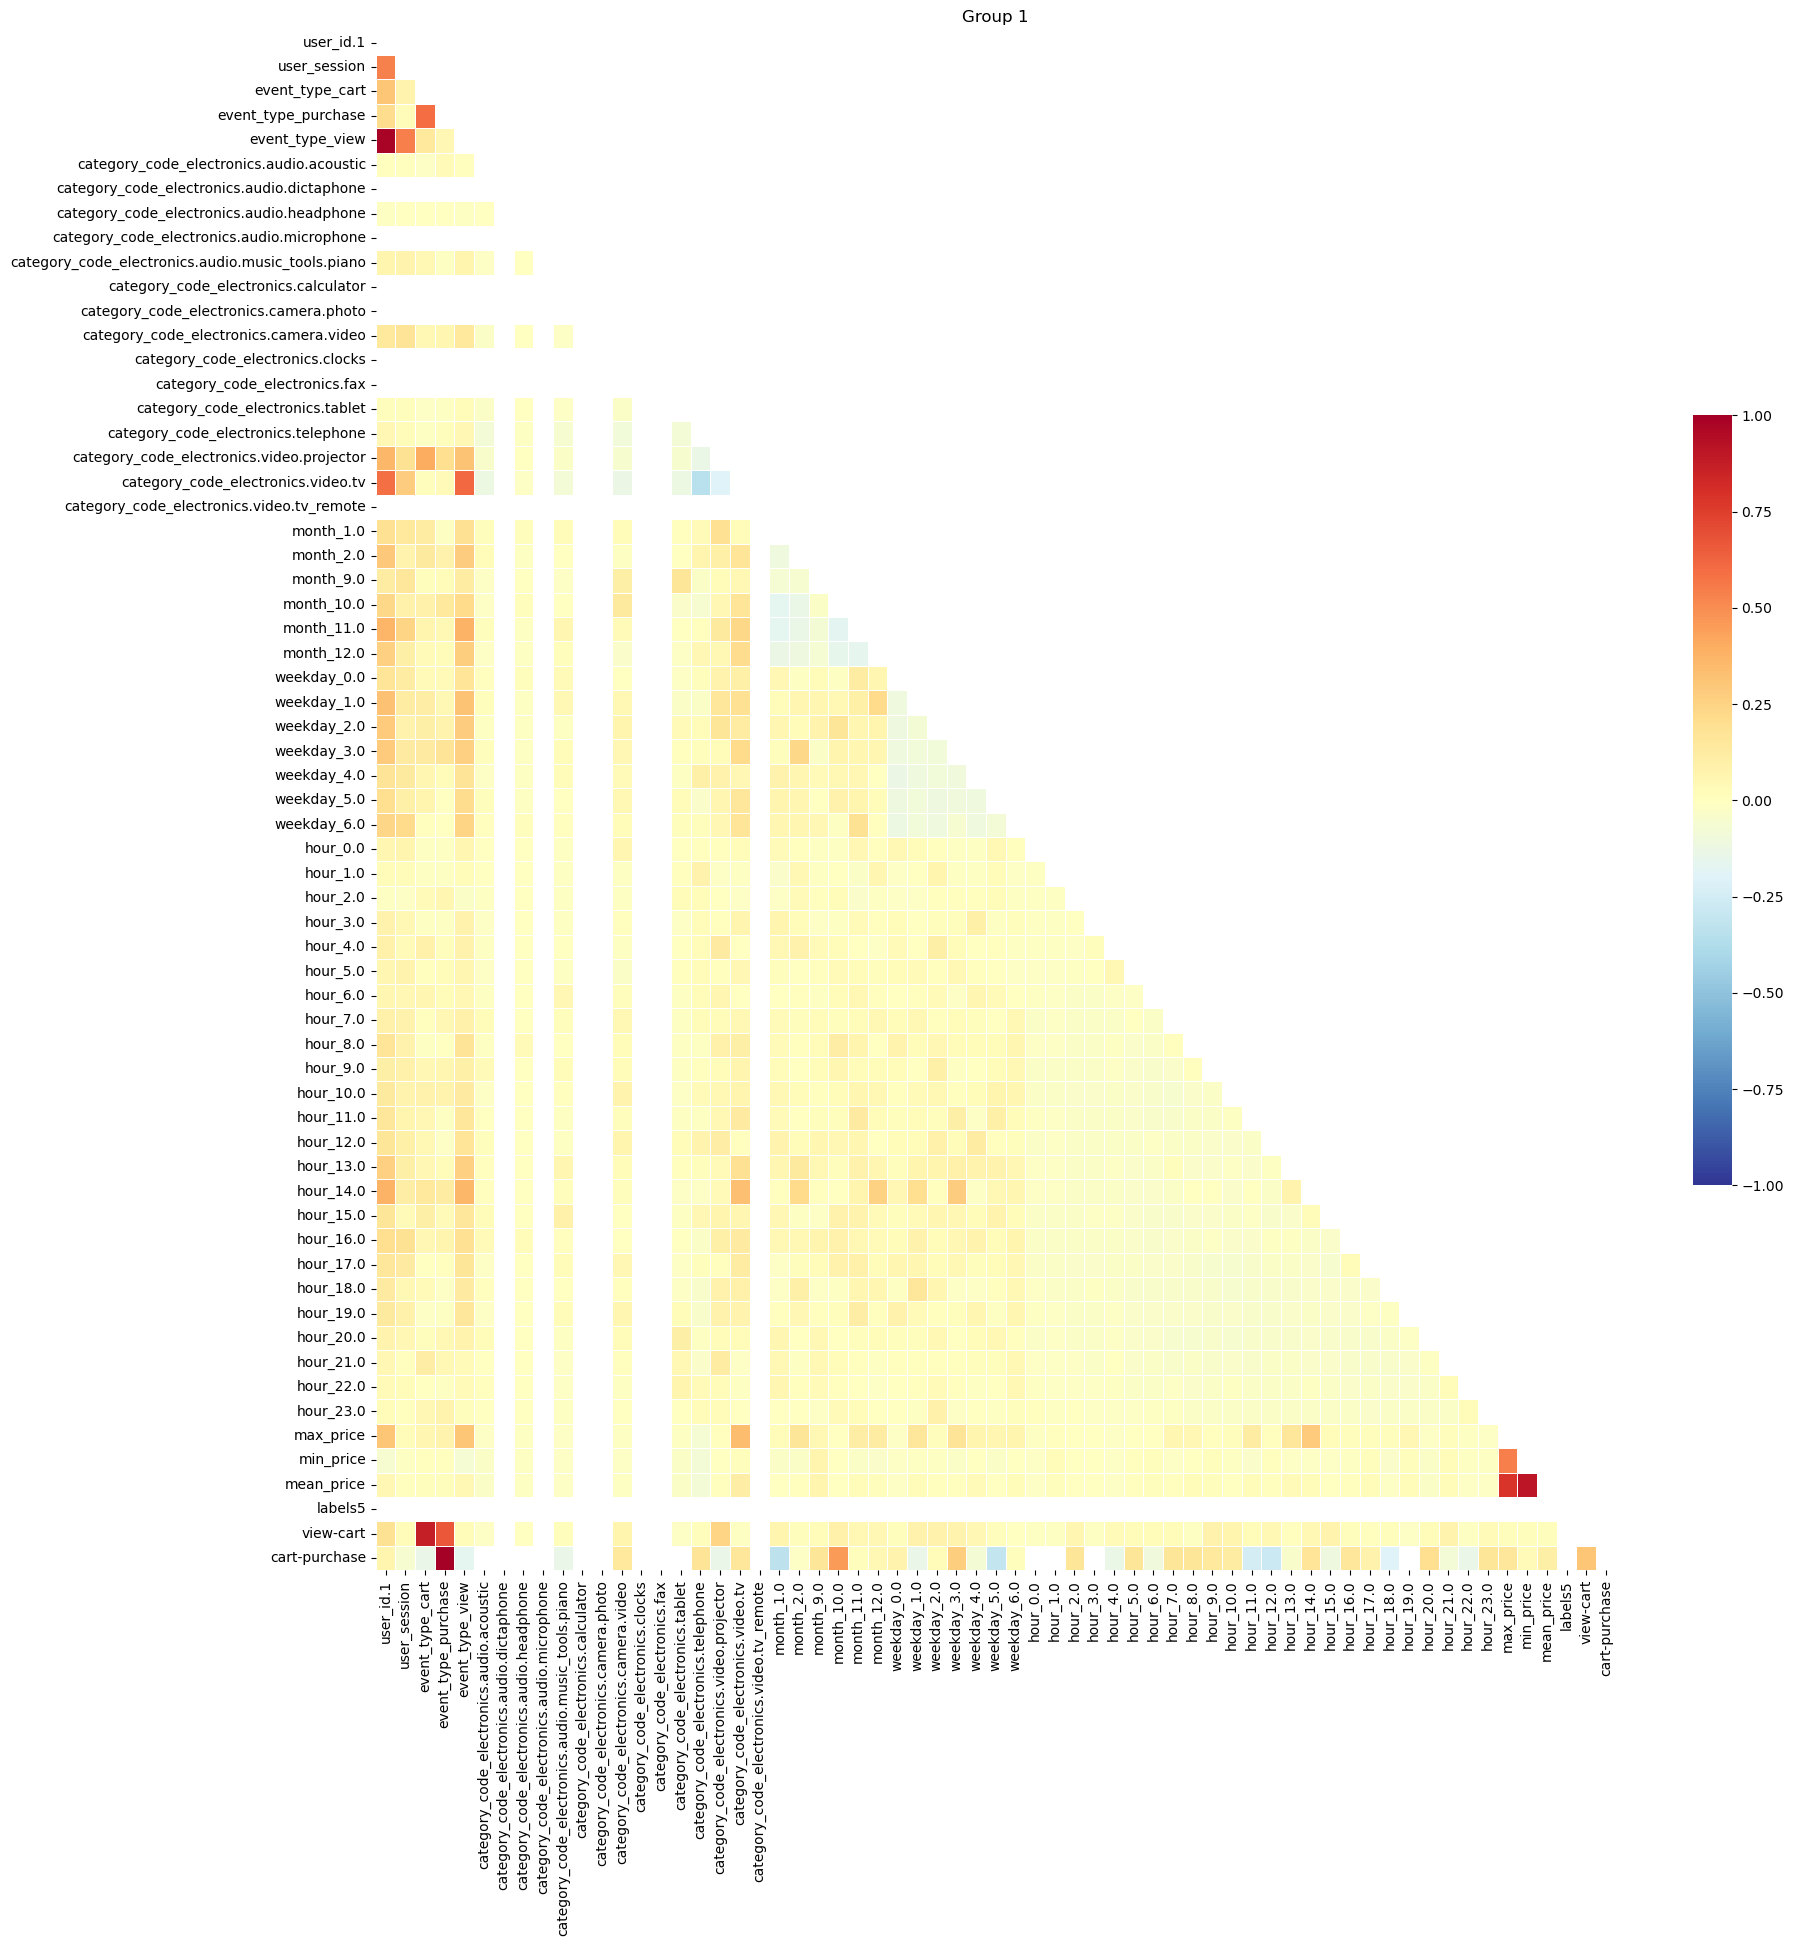

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.title('Group 1')
plt.show()

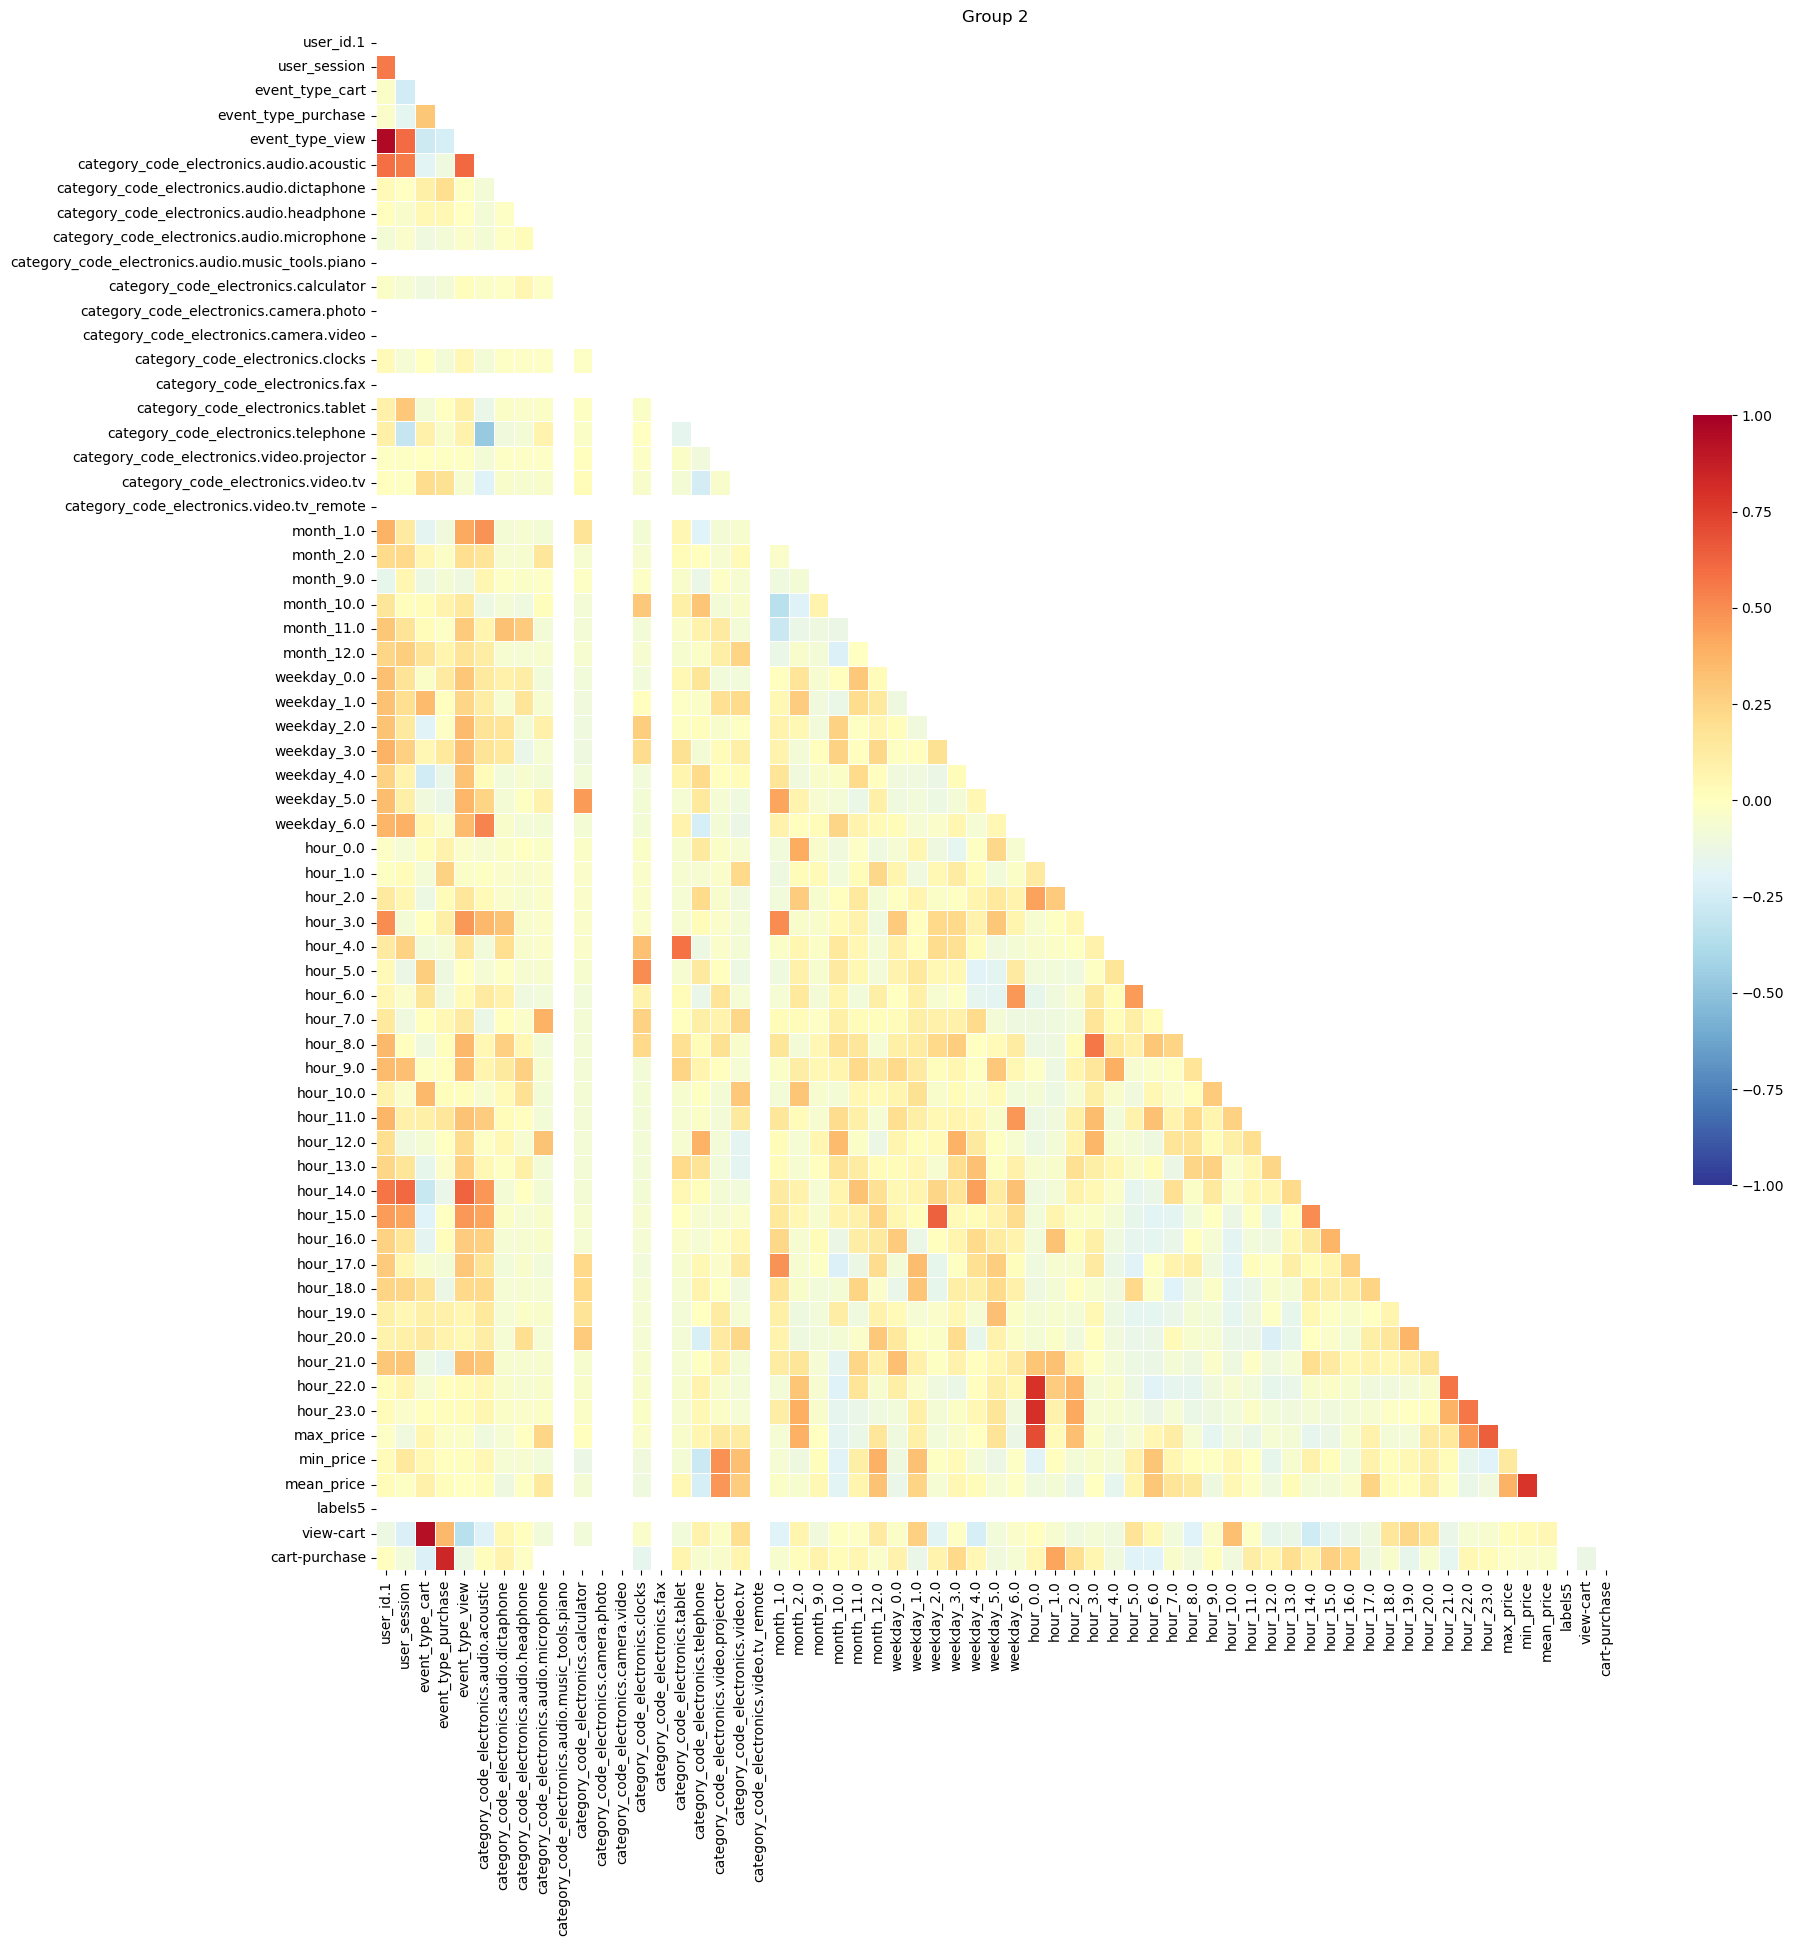

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,      
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.title('Group 2')

plt.show()

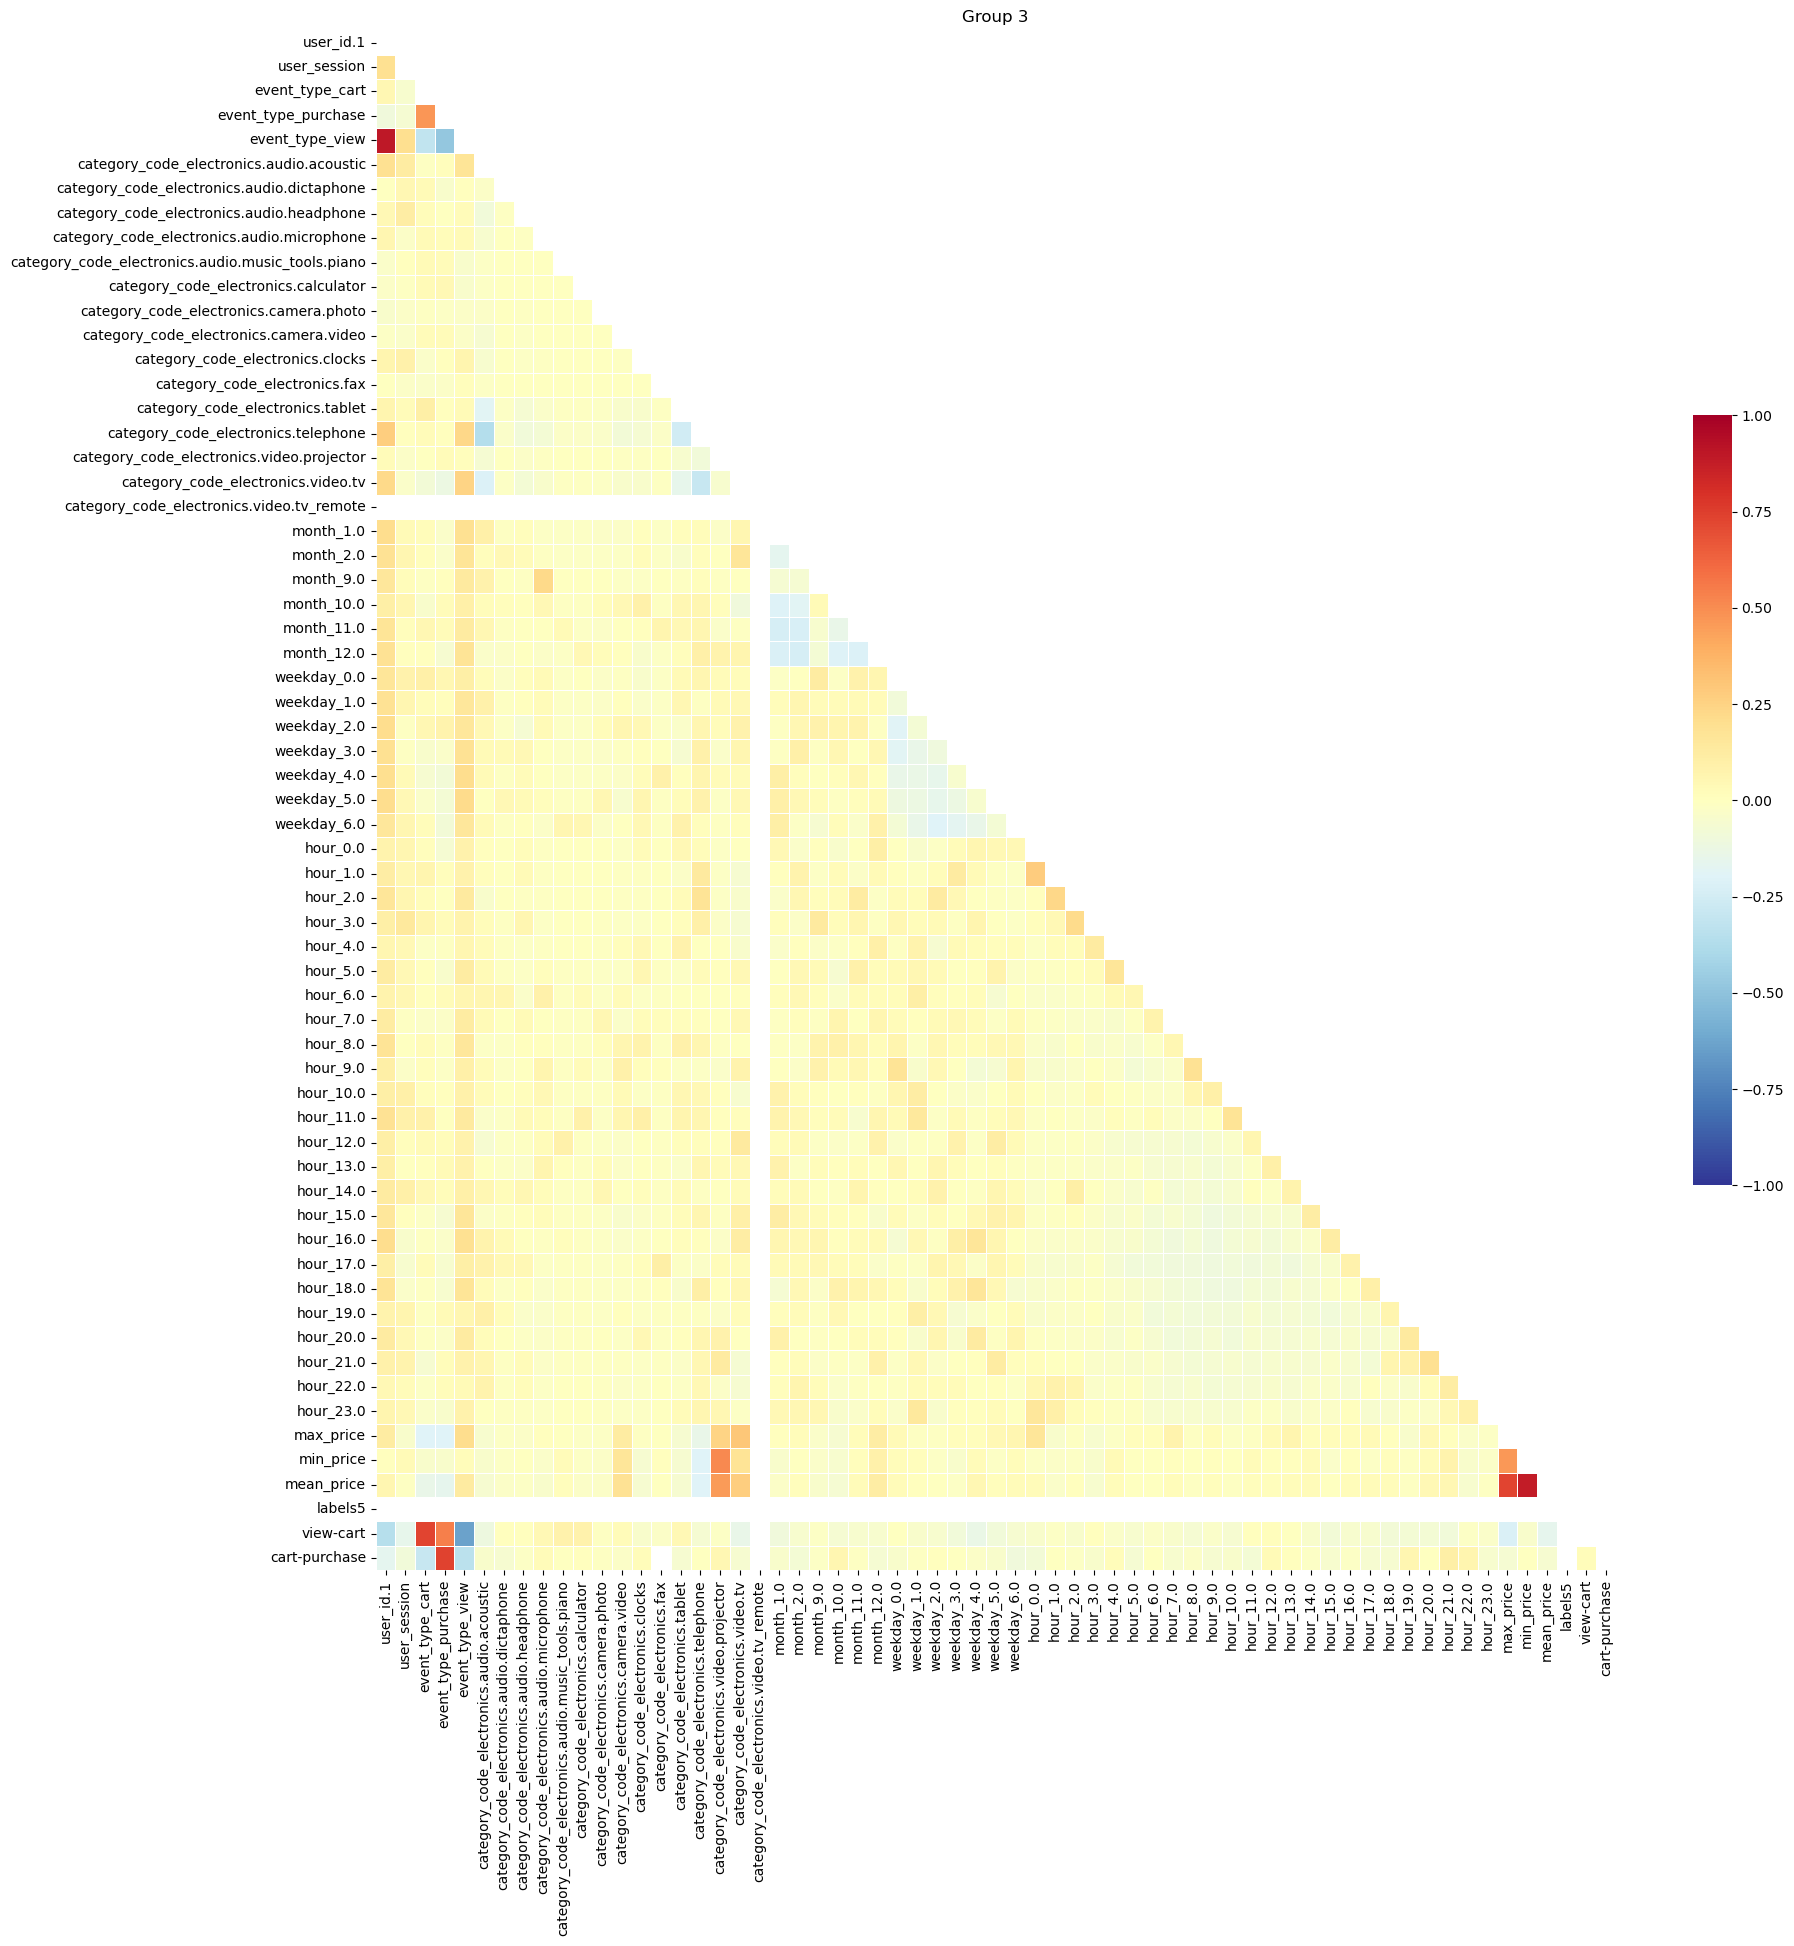

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(df3.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1 
           )  
plt.title('Group 3')

plt.show()

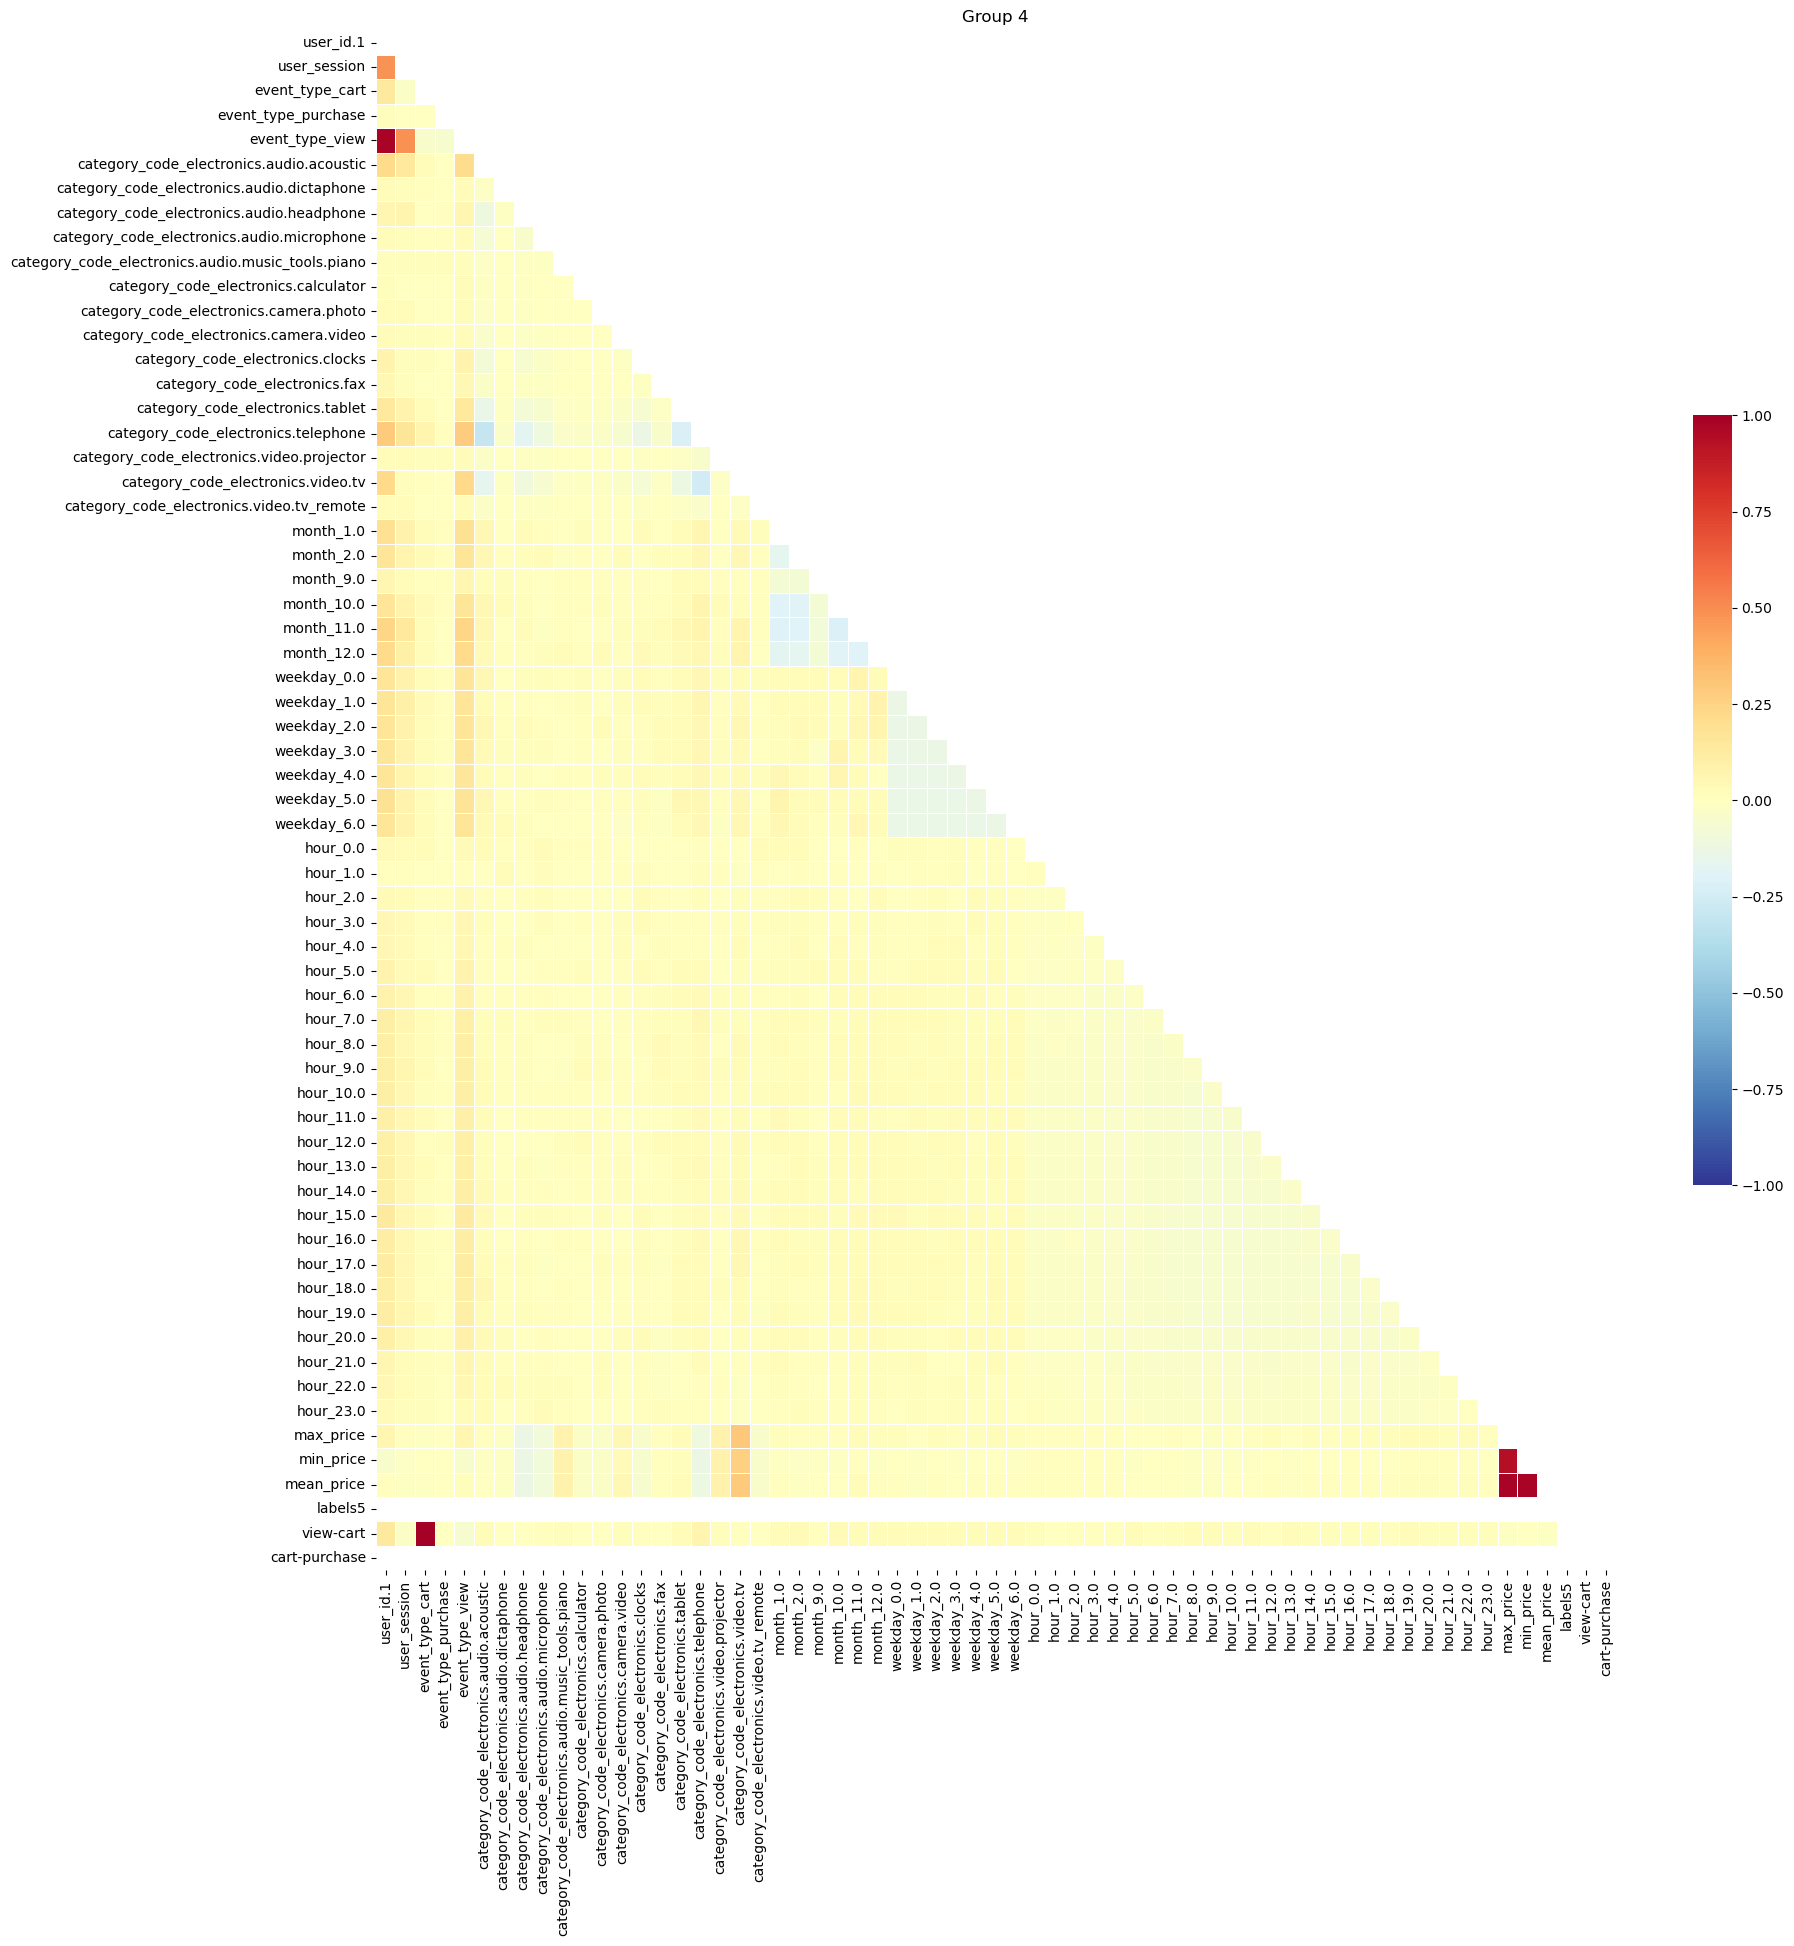

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(df4.corr(), 
            cmap = 'RdYlBu_r', 
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.title('Group 4')

plt.show()

In [19]:
df.columns

Index(['user_id.1', 'user_session', 'event_type_cart', 'event_type_purchase',
       'event_type_view', 'category_code_electronics.audio.acoustic',
       'category_code_electronics.audio.dictaphone',
       'category_code_electronics.audio.headphone',
       'category_code_electronics.audio.microphone',
       'category_code_electronics.audio.music_tools.piano',
       'category_code_electronics.calculator',
       'category_code_electronics.camera.photo',
       'category_code_electronics.camera.video',
       'category_code_electronics.clocks', 'category_code_electronics.fax',
       'category_code_electronics.tablet',
       'category_code_electronics.telephone',
       'category_code_electronics.video.projector',
       'category_code_electronics.video.tv',
       'category_code_electronics.video.tv_remote', 'month_1.0', 'month_2.0',
       'month_9.0', 'month_10.0', 'month_11.0', 'month_12.0', 'weekday_0.0',
       'weekday_1.0', 'weekday_2.0', 'weekday_3.0', 'weekday_4.0',
     

그룹별, 월별 데이터 건수 계산(9월은 데이터 건수가 적어서 제외)

In [20]:
df_month = df.groupby(['labels5'])['month_9.0', 'month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0'].agg('sum')

In [21]:
df_month.drop(columns='month_9.0', inplace = True)

In [22]:
df_month = df_month.T

In [23]:
df_month

labels5,0,1,2,3,4
month_10.0,5735.0,913.0,830.0,1833.0,14793.0
month_11.0,7051.0,1143.0,740.0,2581.0,16703.0
month_12.0,6180.0,794.0,404.0,2875.0,13430.0
month_1.0,6001.0,746.0,900.0,2836.0,13200.0
month_2.0,5247.0,646.0,368.0,2488.0,12167.0


In [24]:
df_month.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='labels5')

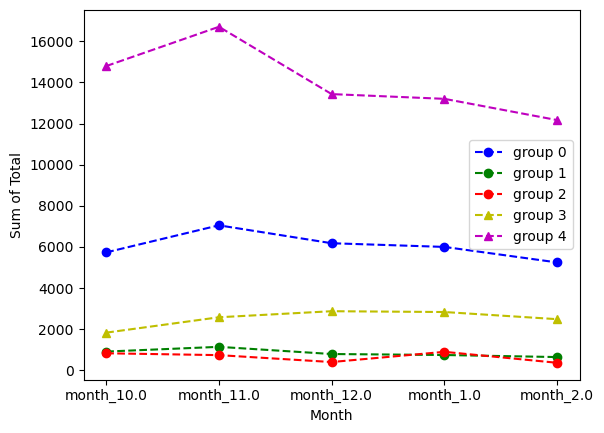

In [25]:
plt.plot(df_month[0],'bo--', label = 'group 0')
plt.plot(df_month[1],'go--', label = 'group 1')
plt.plot(df_month[2],'ro--', label = 'group 2')
plt.plot(df_month[3],'y^--', label = 'group 3')
plt.plot(df_month[4],'m^--', label = 'group 4')

plt.xlabel('Month')
plt.ylabel('Sum of Total')
plt.legend()

In [26]:
df1

,user_id.1,user_session,event_type_cart,event_type_purchase,event_type_view,category_code_electronics.audio.acoustic,category_code_electronics.audio.dictaphone,category_code_electronics.audio.headphone,category_code_electronics.audio.microphone,category_code_electronics.audio.music_tools.piano,...,hour_20.0,hour_21.0,hour_22.0,hour_23.0,max_price,min_price,mean_price,labels5,view-cart,cart-purchase
11,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1297.21,1297.21,1297.21,1,0.0,NaN
32,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,721.44,721.44,721.44,1,0.0,NaN
58,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,988.06,988.06,988.06,1,0.0,NaN
68,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,988.06,988.06,988.06,1,0.0,NaN
88,3.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1062.89,1062.89,1062.89,1,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66689,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1297.21,1297.21,1297.21,1,0.0,NaN
66705,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2267.03,2267.03,2267.03,1,0.0,NaN
66744,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3061.11,3061.11,3061.11,1,0.0,NaN
66763,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,980.49,980.49,980.49,1,0.0,NaN


In [27]:
df.groupby(['labels5'])['month_9.0', 'month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0','event_type_cart', 'event_type_purchase', 'event_type_view'].agg('sum')

,month_9.0,month_10.0,month_11.0,month_12.0,month_1.0,month_2.0,event_type_cart,event_type_purchase,event_type_view
labels5,,,,,,,,,
0,953.0,5735.0,7051.0,6180.0,6001.0,5247.0,3258.0,2268.0,25641.0
1,174.0,913.0,1143.0,794.0,746.0,646.0,39.0,20.0,4357.0
2,18.0,830.0,740.0,404.0,900.0,368.0,258.0,148.0,2854.0
3,280.0,1833.0,2581.0,2875.0,2836.0,2488.0,1281.0,1313.0,10299.0
4,2573.0,14793.0,16703.0,13430.0,13200.0,12167.0,621.0,69.0,72176.0


그룹별 데이터 파싱

In [50]:
def func(x):

    d = {}

    d['view'] = x['event_type_view'].sum()

    d['cart'] = x['event_type_cart'].sum()

    d['purchase'] = x['event_type_purchase'].sum()
    
    d['total_price'] = x['mean_price'].sum()
    
    d['mean_price'] = x['mean_price'].mean()

    # d['cart/view'] = round(x['event_type_cart'].sum() / x['event_type_view'].sum(), 4)  * 100

    # d['purchase/cart'] = round(x['event_type_purchase'].sum() / x['event_type_cart'].sum(), 4) * 100
    
    # d['label'] = x['labels5'].mean()


    return pd.Series(d, index=['view', 'cart', 'purchase','total_price','mean_price'])#, 'cart/view', 'purchase/cart', 'label'])

In [55]:
df_g_0 = pd.DataFrame(df0.groupby('month_9.0').apply(func).drop(0.0).sum()).T
for m in ['month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']:
    df_g_0 = pd.concat([df_g_0, pd.DataFrame(df0.groupby(m).apply(func).drop(0.0).sum()).T])
df_g_0.index =  ['month_9.0','month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']

In [51]:
df_g_1 = pd.DataFrame(df1.groupby('month_9.0').apply(func).drop(0.0).sum()).T
for m in ['month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']:
    df_g_1 = pd.concat([df_g_1, pd.DataFrame(df1.groupby(m).apply(func).drop(0.0).sum()).T])
df_g_1.index =  ['month_9.0','month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']

In [52]:
df_g_2 = pd.DataFrame(df2.groupby('month_9.0').apply(func).drop(0.0).sum()).T
for m in ['month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']:
    df_g_2 = pd.concat([df_g_2, pd.DataFrame(df2.groupby(m).apply(func).drop(0.0).sum()).T])
df_g_2.index =  ['month_9.0','month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']

In [53]:
df_g_3 = pd.DataFrame(df3.groupby('month_9.0').apply(func).drop(0.0).sum()).T
for m in ['month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']:
    df_g_3 = pd.concat([df_g_3, pd.DataFrame(df3.groupby(m).apply(func).drop(0.0).sum()).T])
df_g_3.index =  ['month_9.0','month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']

In [54]:
df_g_4 = pd.DataFrame(df4.groupby('month_9.0').apply(func).drop(0.0).sum()).T
for m in ['month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']:
    df_g_4 = pd.concat([df_g_4, pd.DataFrame(df4.groupby(m).apply(func).drop(0.0).sum()).T])
df_g_4.index =  ['month_9.0','month_10.0', 'month_11.0', 'month_12.0','month_1.0', 'month_2.0']

In [36]:
df_g_0

,view,cart,purchase,cart/view,purchase/cart
month_9.0,918.0,118.0,81.0,12.85,68.64
month_10.0,5322.0,617.0,449.0,11.59,72.77
month_11.0,6584.0,724.0,520.0,11.00,71.82
month_12.0,5564.0,736.0,496.0,13.23,67.39
month_1.0,5635.0,629.0,432.0,11.16,68.68
month_2.0,4816.0,597.0,379.0,12.40,63.48


In [56]:
df_g_1

,view,cart,purchase,total_price,mean_price
month_9.0,187.0,1.0,1.0,2.001825e+05,9718.463699
month_10.0,940.0,9.0,9.0,8.758513e+05,8019.990626
month_11.0,1184.0,9.0,4.0,1.079797e+06,14932.494141
month_12.0,820.0,7.0,3.0,7.408234e+05,11686.870953
month_1.0,759.0,9.0,1.0,7.131014e+05,12161.943079
month_2.0,659.0,5.0,2.0,5.852109e+05,12855.280089


In [40]:
df_g_2

,view,cart,purchase,cart/view,purchase/cart
month_9.0,60.0,2.0,2.0,3.33,100.00
month_10.0,1228.0,85.0,62.0,6.92,72.94
month_11.0,1233.0,94.0,65.0,7.62,69.15
month_12.0,1080.0,95.0,65.0,8.80,68.42
month_1.0,1347.0,88.0,57.0,6.53,64.77
month_2.0,976.0,65.0,38.0,6.66,58.46


In [41]:
df_g_3

,view,cart,purchase,cart/view,purchase/cart
month_9.0,486.0,43.0,55.0,8.85,127.91
month_10.0,1885.0,212.0,247.0,11.25,116.51
month_11.0,2734.0,321.0,305.0,11.74,95.02
month_12.0,3101.0,359.0,328.0,11.58,91.36
month_1.0,3296.0,362.0,356.0,10.98,98.34
month_2.0,2612.0,321.0,303.0,12.29,94.39


In [57]:
for dfn in [df_g_0,df_g_1,df_g_2,df_g_3,df_g_4]:
    dfn['cart/view'] = round(dfn['cart']/ dfn['view'], 4)  * 100
    dfn['purchase/cart'] = round(dfn['purchase'] / dfn['cart'], 4) * 100

In [60]:
df_g_1

,view,cart,purchase,total_price,mean_price,cart/view,purchase/cart
month_9.0,187.0,1.0,1.0,2.001825e+05,9718.463699,0.53,100.00
month_10.0,940.0,9.0,9.0,8.758513e+05,8019.990626,0.96,100.00
month_11.0,1184.0,9.0,4.0,1.079797e+06,14932.494141,0.76,44.44
month_12.0,820.0,7.0,3.0,7.408234e+05,11686.870953,0.85,42.86
month_1.0,759.0,9.0,1.0,7.131014e+05,12161.943079,1.19,11.11
month_2.0,659.0,5.0,2.0,5.852109e+05,12855.280089,0.76,40.00


In [61]:
df_g_4

,view,cart,purchase,total_price,mean_price,cart/view,purchase/cart
month_9.0,2611.0,19.0,5.0,2.366017e+05,372.637336,0.73,26.32
month_10.0,14853.0,140.0,15.0,1.376280e+06,406.700860,0.94,10.71
month_11.0,16839.0,121.0,13.0,1.603377e+06,451.302684,0.72,10.74
month_12.0,13551.0,110.0,11.0,1.229121e+06,406.070847,0.81,10.00
month_1.0,13324.0,112.0,11.0,1.239929e+06,411.098163,0.84,9.82
month_2.0,12198.0,119.0,14.0,1.112264e+06,385.397620,0.98,11.76


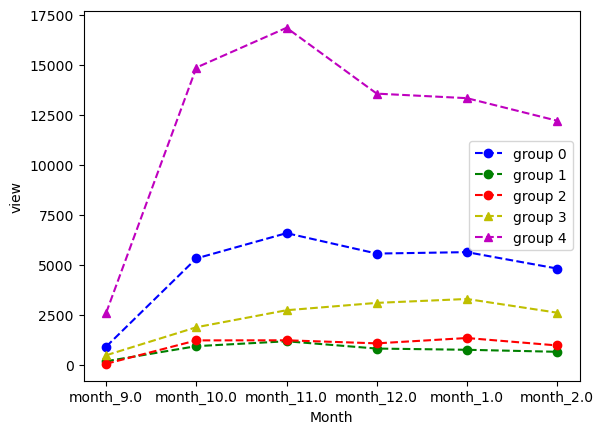

In [62]:
plt.plot(df_g_0['view'],'bo--', label = 'group 0')
plt.plot(df_g_1['view'],'go--', label = 'group 1')
plt.plot(df_g_2['view'],'ro--', label = 'group 2')
plt.plot(df_g_3['view'],'y^--', label = 'group 3')
plt.plot(df_g_4['view'],'m^--', label = 'group 4')

plt.xlabel('Month')
plt.ylabel('view')
plt.legend()

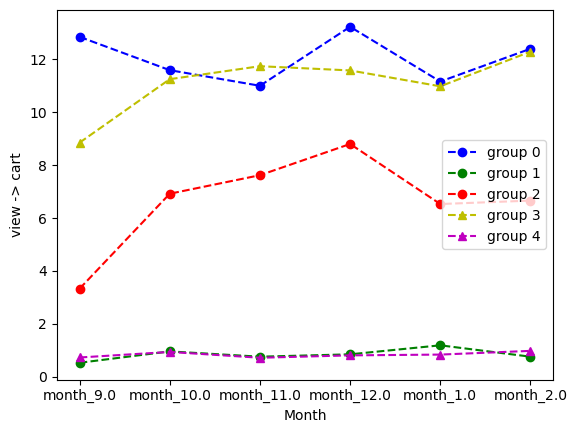

In [37]:
plt.plot(df_g_0['cart/view'],'bo--', label = 'group 0')
plt.plot(df_g_1['cart/view'],'go--', label = 'group 1')
plt.plot(df_g_2['cart/view'],'ro--', label = 'group 2')
plt.plot(df_g_3['cart/view'],'y^--', label = 'group 3')
plt.plot(df_g_4['cart/view'],'m^--', label = 'group 4')

plt.xlabel('Month')
plt.ylabel('view -> cart')
plt.legend()

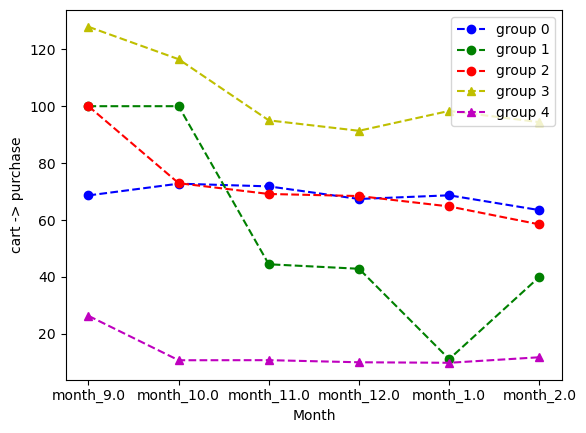

In [38]:
plt.plot(df_g_0['purchase/cart'],'bo--', label = 'group 0')
plt.plot(df_g_1['purchase/cart'],'go--', label = 'group 1')
plt.plot(df_g_2['purchase/cart'],'ro--', label = 'group 2')
plt.plot(df_g_3['purchase/cart'],'y^--', label = 'group 3')
plt.plot(df_g_4['purchase/cart'],'m^--', label = 'group 4')

plt.xlabel('Month')
plt.ylabel('cart -> purchase')
plt.legend()

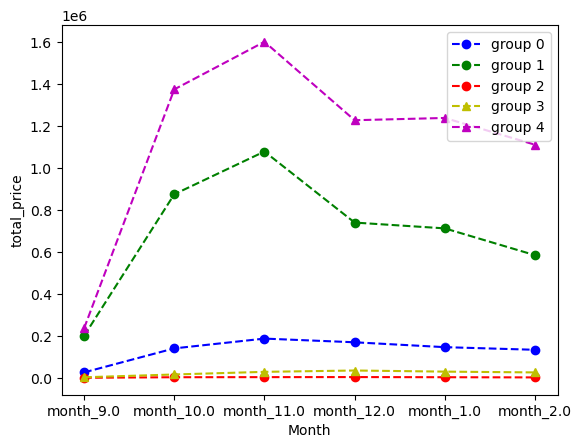

In [58]:
plt.plot(df_g_0['total_price'],'bo--', label = 'group 0')
plt.plot(df_g_1['total_price'],'go--', label = 'group 1')
plt.plot(df_g_2['total_price'],'ro--', label = 'group 2')
plt.plot(df_g_3['total_price'],'y^--', label = 'group 3')
plt.plot(df_g_4['total_price'],'m^--', label = 'group 4')

plt.xlabel('Month')
plt.ylabel('total_price')
plt.legend()

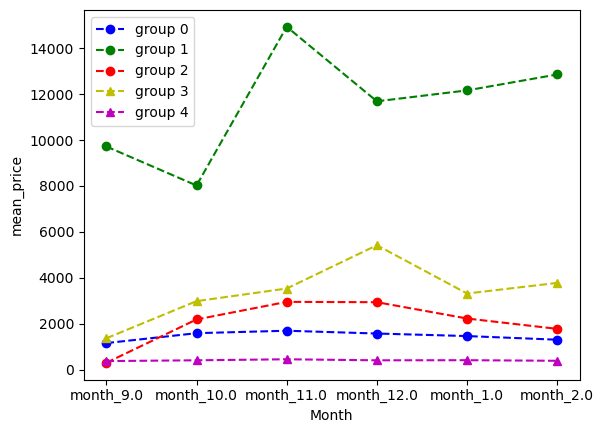

In [59]:
plt.plot(df_g_0['mean_price'],'bo--', label = 'group 0')
plt.plot(df_g_1['mean_price'],'go--', label = 'group 1')
plt.plot(df_g_2['mean_price'],'ro--', label = 'group 2')
plt.plot(df_g_3['mean_price'],'y^--', label = 'group 3')
plt.plot(df_g_4['mean_price'],'m^--', label = 'group 4')

plt.xlabel('Month')
plt.ylabel('mean_price')
plt.legend()